In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
df=pd.read_csv('machine_data.txt',header=None,names=['vendor_name','model_name','myct','mmin',
                                                     'mmax','cach','chmin','chmax','prp','erp'])
df

,vendor_name,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [4]:
## checking for null values

df.isnull().sum()

vendor_name    0
model_name     0
myct           0
mmin           0
mmax           0
cach           0
chmin          0
chmax          0
prp            0
erp            0
dtype: int64

In [5]:
## checking for duplicates

df.duplicated().sum()

0

In [6]:
## checking for outliers.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers=df[(df < (Q1 - 1.5 *IQR)) | (df > (Q3 + 1.5 *IQR)) ]
outliers.isnull().sum()

vendor_name    209
model_name     209
myct           189
mmin           201
mmax           205
cach           194
chmin          194
chmax          194
prp            186
erp            185
dtype: int64

In [7]:
## before removing the outliers the shape of df
df.shape

(209, 10)

In [8]:
## after removing outliers the shape of df

df1=df[~((df < (Q1 - 1.5 *IQR)) | (df > (Q3 + 1.5 *IQR))).any(axis=1)]
df1.shape

(149, 10)

In [9]:
df1

,vendor_name,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
10,apollo,dn320,400,1000,3000,0,1,2,38,23
11,apollo,dn420,400,512,3500,4,1,6,40,24
12,basf,7/65,60,2000,8000,65,1,8,92,70
13,basf,7/68,50,4000,16000,65,1,8,138,117
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [10]:
df1.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,146.429530,1975.328859,8890.899329,14.255034,2.979866,11.093960,59.718121,55.436242
std,108.928271,1787.823146,6269.005225,18.445740,2.795918,8.923354,46.510255,38.805879
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,56.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,29.000000,27.000000
50%,112.000000,2000.000000,8000.000000,8.000000,1.000000,8.000000,45.000000,42.000000
75%,200.000000,2000.000000,16000.000000,24.000000,4.000000,16.000000,71.000000,74.000000
max,480.000000,8000.000000,32000.000000,65.000000,12.000000,48.000000,237.000000,183.000000


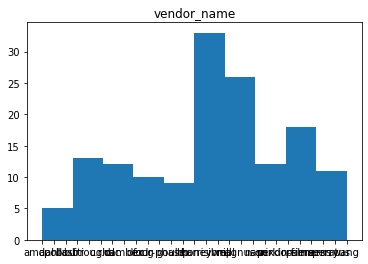

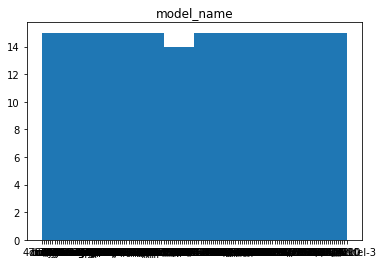

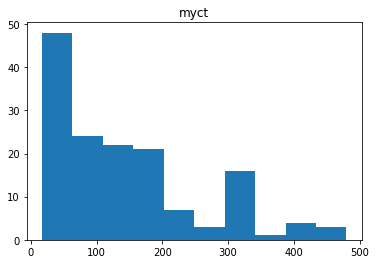

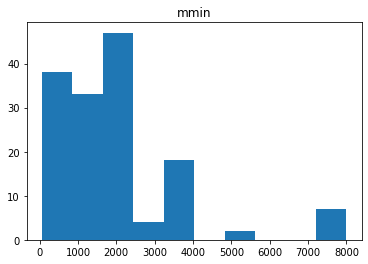

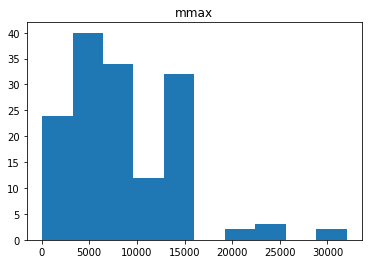

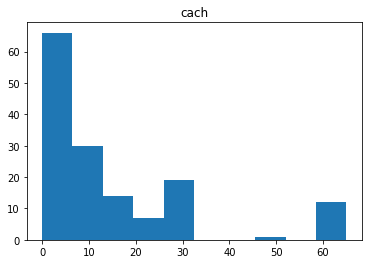

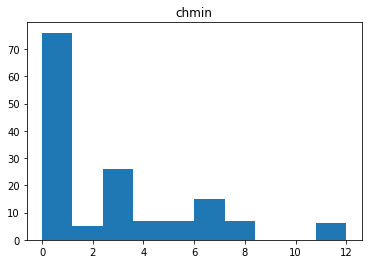

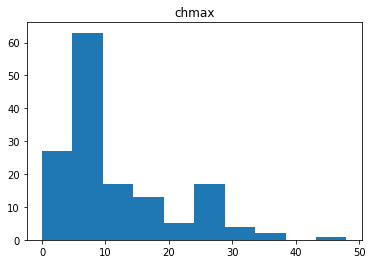

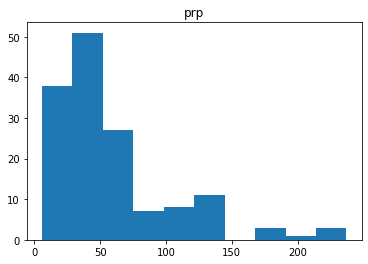

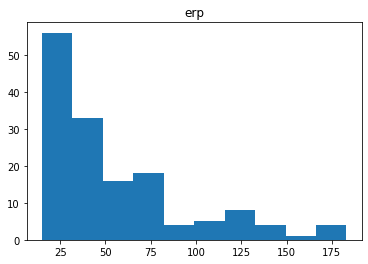

In [11]:
for feature in df1.columns:
    plt.title(feature)
    plt.hist(df1[feature])
    plt.show()

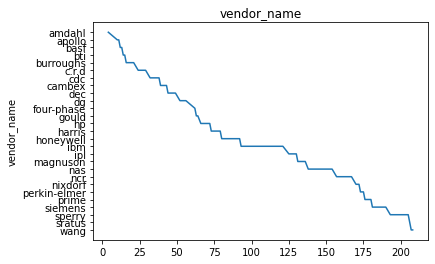

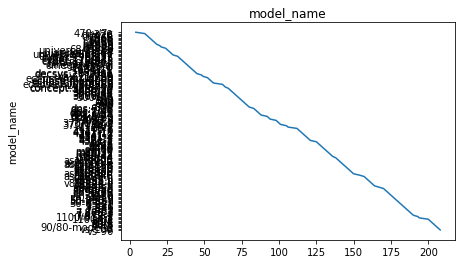

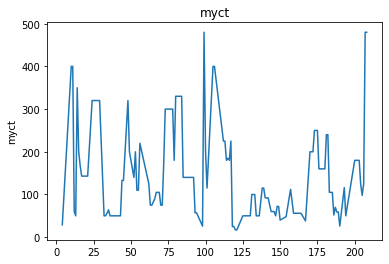

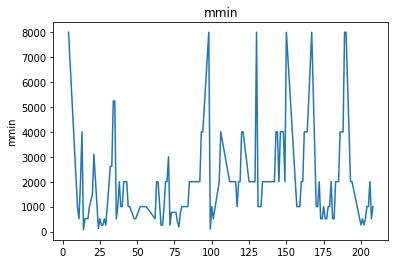

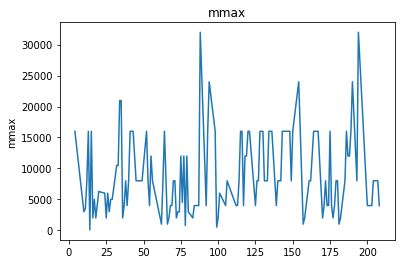

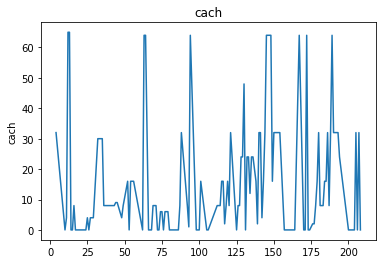

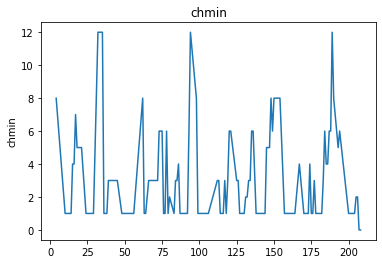

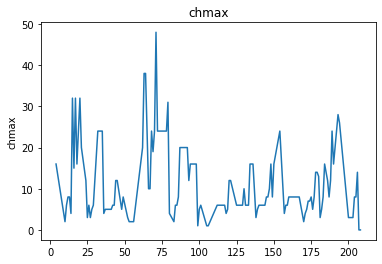

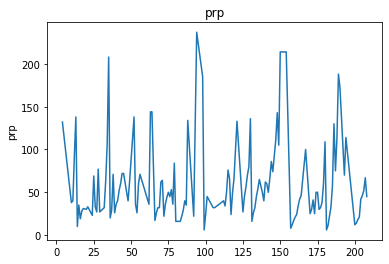

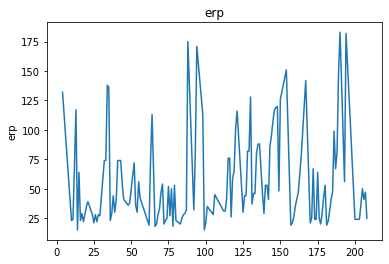

In [12]:
for feature in df1.columns:
    plt.title(feature)
    sbn.lineplot(data=df1[feature])
    plt.show()

In [13]:
df1.corr()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
myct,1.000000,-0.508700,-0.481266,-0.390695,-0.354410,-0.217967,-0.398273,-0.516526
mmin,-0.508700,1.000000,0.610952,0.516652,0.507474,0.184550,0.718352,0.768415
mmax,-0.481266,0.610952,1.000000,0.552719,0.402039,0.265454,0.753750,0.935027
cach,-0.390695,0.516652,0.552719,1.000000,0.327766,0.208634,0.661776,0.719334
chmin,-0.354410,0.507474,0.402039,0.327766,1.000000,0.502995,0.520850,0.527429
chmax,-0.217967,0.184550,0.265454,0.208634,0.502995,1.000000,0.330765,0.307963
prp,-0.398273,0.718352,0.753750,0.661776,0.520850,0.330765,1.000000,0.851840
erp,-0.516526,0.768415,0.935027,0.719334,0.527429,0.307963,0.851840,1.000000


<AxesSubplot: >

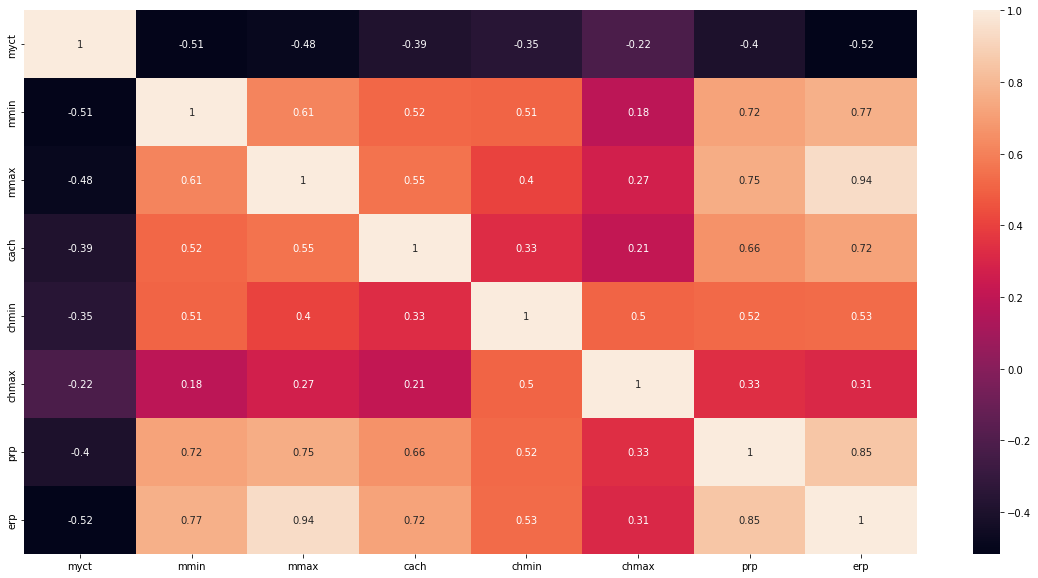

In [14]:
plt.figure(figsize=(20,10))
sbn.heatmap(df1.corr(),annot=True)

In [15]:
## splitting the data into independent(x) and dependent(y) variables

In [16]:
x=df1.iloc[:,2:9].values
x

array([[   29,  8000, 16000, ...,     8,    16,   132],
       [  400,  1000,  3000, ...,     1,     2,    38],
       [  400,   512,  3500, ...,     1,     6,    40],
       ...,
       [  125,  2000,  8000, ...,     2,    14,    52],
       [  480,   512,  8000, ...,     0,     0,    67],
       [  480,  1000,  4000, ...,     0,     0,    45]], dtype=int64)

In [17]:
y=df1.iloc[:,9].values
y

array([132,  23,  24,  70, 117,  15,  64,  23,  29,  22,  35,  39,  28,
        21,  28,  22,  28,  27,  74,  74, 138, 136,  23,  29,  44,  30,
        41,  74,  74,  74,  54,  41,  36,  38,  72,  36,  30,  56,  42,
        19,  75, 113,  18,  20,  28,  33,  47,  54,  20,  23,  25,  52,
        27,  50,  18,  53,  23,  20,  25,  28,  29,  32, 175,  32,  82,
       171, 113,  15,  21,  35,  28,  45,  31,  31,  42,  76,  76,  26,
        59,  65, 101, 116,  30,  44,  44,  82,  82, 128,  37,  46,  46,
        80,  88,  88,  46,  29,  53,  53,  41,  86,  95, 107, 117, 119,
       120,  48, 126, 151,  19,  21,  26,  35,  41,  47,  62,  78, 142,
        21,  25,  67,  24,  24,  64,  25,  20,  29,  43,  53,  19,  22,
        31,  41,  47,  99,  67,  81, 149, 183,  56, 182,  24,  24,  24,
        24,  37,  50,  41,  47,  25], dtype=int64)

In [18]:
# splitting the data into training and testing data

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
x_train

array([[-0.90117369, -0.03117194,  1.10473332, -0.35334453, -0.01717387,
        -0.68458769, -0.43137366],
       [-0.53549486, -0.03117194, -0.18408431,  0.92083727, -0.69840397,
        -0.57237566, -0.01554972],
       [-0.53549486, -0.03117194, -0.18408431,  0.92083727, -0.69840397,
        -0.57237566,  0.02603268],
       [-0.33524217, -0.81366108, -0.50628872,  0.07138273, -0.69840397,
        -0.57237566, -0.32741768],
       [-0.90117369,  0.2948652 ,  0.21544915,  0.81465545,  3.04836161,
         1.44744091, -0.59770324],
       [-0.70962764, -0.03117194, -0.18408431,  0.07138273,  1.00467129,
        -0.34795159,  0.92005415],
       [-0.82281394,  3.1240262 ,  1.10473332,  2.61974635,  3.04836161,
         1.44744091,  2.64572351],
       [-0.11757621, -0.03117194, -0.82849313, -0.35334453, -0.69840397,
         0.99859279, -0.53532965],
       [ 1.27548599, -0.67903929,  0.46032451, -0.45952635,  1.00467129,
         1.44744091, -0.22346169],
       [ 2.14614986, -0.8136

In [21]:
x_test

array([[-0.88376041,  1.02056077,  1.10473332,  0.92083727,  0.32344118,
         0.10089653,  1.43983408],
       [-0.60514797, -0.5570383 , -1.15069754, -0.7780718 , -0.69840397,
        -0.57237566, -1.01352718],
       [-0.11757621, -0.03117194, -0.82849313, -0.7780718 , -0.01717387,
        -0.57237566, -0.66007683],
       [-1.18849277,  1.02056077,  1.10473332, -0.35334453,  1.00467129,
         0.10089653,  0.81609817],
       [ 0.11750304, -0.80735069, -1.15069754, -0.35334453,  0.32344118,
         0.43753263, -0.8679888 ],
       [-0.70962764,  1.02056077,  1.10473332,  2.61974635,  1.6859014 ,
         0.54974466,  1.71011964],
       [ 0.23068934, -0.94512767, -0.82849313, -0.7780718 , -0.69840397,
        -0.90901175, -1.01352718],
       [-0.33524217, -0.03117194, -0.82849313, -0.67188999, -0.69840397,
        -0.68458769, -0.43137366],
       [ 0.40482212, -0.5570383 , -0.82849313, -0.7780718 , -0.69840397,
        -0.79679972, -0.63928563],
       [-0.90117369, -0.0311

### We are calling linear regression and fitting these both variables. We are using RMSE and r^2 value to validate our findings

In [22]:
# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)
print('predicted response:', y_pred, sep='\n')
y_pred.shape

predicted response:
[103.62575054  12.89542269  28.89198345  93.20030213  18.94333672
 123.7630336   17.84214133  27.77846087  22.428462    45.79556281
  40.47783422  23.96382209  16.27721939  46.5793759   60.5576104
  53.56854382  32.85733544  33.56849264  29.25726828  32.32099769
  75.95903972  30.28498938  83.90963476  14.2940657  151.87300464
  49.72690999  49.94850162  42.42618729  12.67384136  77.34383637]


(30,)

In [25]:
y_test.shape

(30,)

### We are plotting the line a between predicted and test value. If they are same, it should be a stright line. But this is how our predictions looks like. The 45 degree line shows test=pred

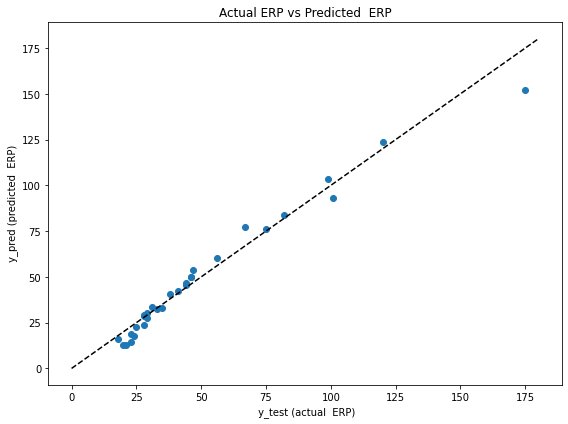

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot([0,180], [0,180], '--k')
plt.axis('tight')
plt.xlabel(" y_test (actual  ERP)")
plt.ylabel(" y_pred (predicted  ERP)")
plt.scatter(y_test,y_pred)
plt.title("Actual ERP vs Predicted  ERP")
plt.tight_layout()

In [27]:
from sklearn import metrics

y_train_predict= model.predict(x_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r_sq =round( model.score(x_train, y_train))

print(f"The model performance for training set")

print(f"--------------------------------------")

print(f'RMSE is {rmse}')
print(f'R2 score is {r_sq}')



The model performance for training set
--------------------------------------
RMSE is 5.913573040166388
R2 score is 1


In [28]:
y_pred_1 = model.predict(x_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))
r2 = round(model.score(x_test, y_test),2)

print(f"The model performance for testing set")
print("--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for testing set
--------------------------------------
Root Mean Squared Error: 6.182846833416336
R^2: 0.97


In [29]:
print(f'Coefficient of determination: {metrics.r2_score(y_test, y_pred_1) :.4f}')

Coefficient of determination: 0.9686


In [30]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4 = df3.head(10)
df4

,Actual,Predicted
0,99,103.625751
1,21,12.895423
2,28,28.891983
3,101,93.200302
4,23,18.943337
5,120,123.763034
6,24,17.842141
7,29,27.778461
8,25,22.428462
9,44,45.795563


<AxesSubplot: >

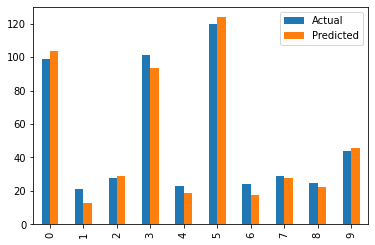

In [31]:
df4.plot(kind='bar')

In [32]:
# importing modules for validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# importing different regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()



              Linear: -45.36, 37.22
               Lasso: -47.93, 44.40
          ElasticNet: -111.98, 117.37
               Ridge: -45.52, 39.74
       BayesianRidge: -45.34, 38.02
                 KNN: -144.27, 154.26
        DecisionTree: -166.95, 204.57
                 SVR: -1117.96, 664.15
            AdaBoost: -161.77, 202.45
       GradientBoost: -99.36, 157.82
        RandomForest: -110.31, 148.86


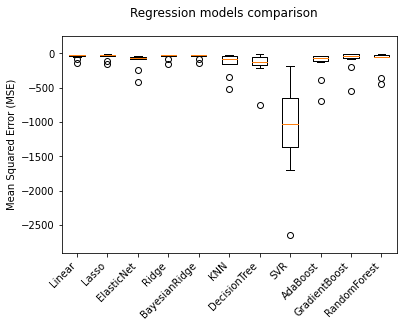

In [33]:
# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=None)
    results = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:.2f}, {:.2f}".format(model_name, round(results.mean(), 3), 
                                  round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure();
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();
#plt.clf()
#plt.close()